# Instancias donde la búsqueda local corrige mejor

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

## Lectura de archivos

In [2]:
permutaCamino = pd.read_csv('exp-ej3-mejor-permutaCamino.csv')
permutaYReemplazaPokeparadas = pd.read_csv('exp-ej3-mejor-permutaYReemplazaPokeparadas.csv')

## Descripción de los datos

In [3]:
permutaCamino['cantNodos'] = permutaCamino['cantGimnasios'] + permutaCamino['cantPokeparadas']
permutaYReemplazaPokeparadas['cantNodos'] = permutaYReemplazaPokeparadas['cantGimnasios'] + permutaYReemplazaPokeparadas['cantPokeparadas']

In [4]:
permutaCamino.describe()

,cantGimnasios,cantPokeparadas,tamMochila,distanciaOriginal,distanciaNueva,cantPermutacionesParaMejorar,cantPermutacionesParaMantener,cantReemplazosParaMejorar,cantReemplazosParaMantener,tamCamino,tiempo,cantNodos
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.000000,3.000000e+03,3000.000000
mean,49.800000,385.033333,250.933333,46660.266667,9610.633333,986.433333,0.266667,0.0,0.0,133.766667,7.441613e+08,434.833333
std,30.633415,250.684223,155.433315,28918.048499,4828.589717,762.647050,0.853892,0.0,0.0,82.259555,8.279618e+08,278.940032
min,1.000000,2.000000,2.000000,703.000000,703.000000,0.000000,0.000000,0.0,0.0,2.000000,1.131000e+03,3.000000
25%,18.000000,147.000000,92.000000,17380.000000,5260.000000,159.000000,0.000000,0.0,0.0,49.000000,7.925848e+06,165.000000
50%,52.000000,441.000000,268.000000,51102.500000,9546.000000,938.000000,0.000000,0.0,0.0,140.500000,3.421103e+08,495.500000
75%,77.000000,591.000000,386.000000,72466.000000,13803.000000,1708.000000,0.000000,0.0,0.0,208.000000,1.451624e+09,668.000000
max,95.000000,839.000000,464.000000,90150.000000,17104.000000,2348.000000,4.000000,0.0,0.0,247.000000,3.112234e+09,934.000000


In [5]:
permutaYReemplazaPokeparadas.describe()

,cantGimnasios,cantPokeparadas,tamMochila,distanciaOriginal,distanciaNueva,cantPermutacionesParaMejorar,cantPermutacionesParaMantener,cantReemplazosParaMejorar,cantReemplazosParaMantener,tamCamino,tiempo,cantNodos
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3.000000e+03,3000.000000
mean,49.800000,385.033333,250.933333,46660.266667,42815.000000,254.733333,0.266667,24.866667,0.0,133.766667,4.678609e+08,434.833333
std,30.633415,250.684223,155.433315,28918.048499,26497.639026,197.378439,0.853892,16.777248,0.0,82.259555,5.010275e+08,278.940032
min,1.000000,2.000000,2.000000,703.000000,611.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.164000e+03,3.000000
25%,18.000000,147.000000,92.000000,17380.000000,16342.000000,47.000000,0.000000,12.000000,0.0,49.000000,1.188473e+07,165.000000
50%,52.000000,441.000000,268.000000,51102.500000,47561.500000,243.000000,0.000000,21.500000,0.0,140.500000,3.178016e+08,495.500000
75%,77.000000,591.000000,386.000000,72466.000000,66192.000000,420.000000,0.000000,38.000000,0.0,208.000000,7.876720e+08,668.000000
max,95.000000,839.000000,464.000000,90150.000000,83425.000000,683.000000,4.000000,61.000000,0.0,247.000000,2.712768e+09,934.000000


## Porcentaje de mejora

porcentaje de mejora = 100 - (distanciaNueva * 100 / distanciaOriginal)

In [6]:
permutaCamino['porcentajeMejora'] = 100 - (permutaCamino['distanciaNueva'] * 100 / permutaCamino['distanciaOriginal'])
permutaYReemplazaPokeparadas['porcentajeMejora'] = 100 - (permutaYReemplazaPokeparadas['distanciaNueva'] * 100 / permutaYReemplazaPokeparadas['distanciaOriginal'])

In [7]:
permutaCamino['porcentajeMejora'].describe()

count    3000.000000
mean       70.201509
std        20.632809
min         0.000000
25%        71.430701
50%        78.813012
75%        81.084917
max        84.686633
Name: porcentajeMejora, dtype: float64

In [8]:
permutaYReemplazaPokeparadas['porcentajeMejora'].describe()

count    3000.000000
mean        8.155963
std         3.791787
min         0.000000
25%         6.898516
50%         7.808695
75%         9.145308
max        23.047859
Name: porcentajeMejora, dtype: float64

## \#cambios

In [9]:
permutaCamino['cantCambios'] = permutaCamino['cantPermutacionesParaMejorar'] + permutaCamino['cantReemplazosParaMejorar'] +  permutaCamino['cantPermutacionesParaMantener'] + permutaCamino['cantReemplazosParaMantener']
permutaYReemplazaPokeparadas['cantCambios'] = permutaYReemplazaPokeparadas['cantPermutacionesParaMejorar'] + permutaYReemplazaPokeparadas['cantReemplazosParaMejorar'] + permutaYReemplazaPokeparadas['cantPermutacionesParaMantener'] + permutaYReemplazaPokeparadas['cantReemplazosParaMantener']

permutaCamino['cantCambiosSobreCantNodos'] = permutaCamino['cantCambios'] / permutaCamino['cantNodos']
permutaYReemplazaPokeparadas['cantCambiosSobreCantNodos'] = permutaYReemplazaPokeparadas['cantCambios'] / permutaYReemplazaPokeparadas['cantNodos']

In [52]:
permutaCamino['cantCambiosSobreCantNodos'].describe()

count    3000.000000
mean        1.816717
std         0.956479
min         0.000000
25%         1.470000
50%         1.826532
75%         2.372694
max         3.927046
Name: cantCambiosSobreCantNodos, dtype: float64

In [53]:
permutaYReemplazaPokeparadas['cantCambiosSobreCantNodos'].describe()

count    3000.000000
mean        0.538537
std         0.247101
min         0.000000
25%         0.400000
50%         0.528944
75%         0.700348
max         1.079245
Name: cantCambiosSobreCantNodos, dtype: float64

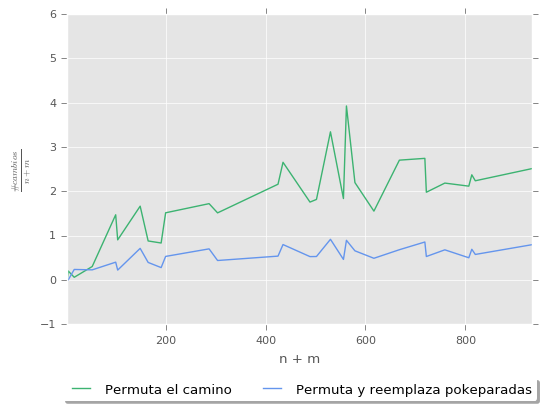

In [10]:
fig, ax = plt.subplots()

ax = permutaCamino.groupby('cantNodos').mean()['cantCambiosSobreCantNodos'].plot(color='mediumseagreen', linewidth = 1)
permutaYReemplazaPokeparadas.groupby('cantNodos').mean()['cantCambiosSobreCantNodos'].plot(color='cornflowerblue', linewidth = 1, ax=ax)

plt.xlabel('n + m')
plt.ylabel(r'$\frac{\# cambios}{n+m}$')
ax.set_ylim([-1, 6])
plt.rcParams.update({'font.size': 8})

legend = ax.legend(['Permuta el camino', 'Permuta y reemplaza pokeparadas',], loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, shadow = True, ncol = 2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_linewidth(0)

plt.show()
#plt.gcf().set_size_inches(6, 4)
#plt.savefig('expMejor_cantCambios.pdf', format='pdf', bbox_inches = 'tight', dpi = 100)